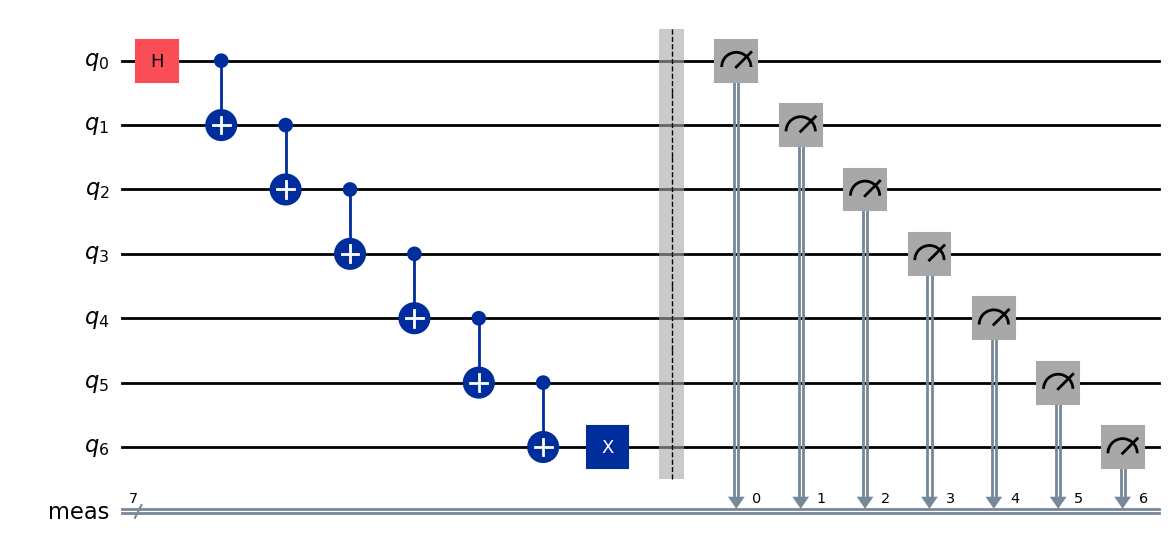

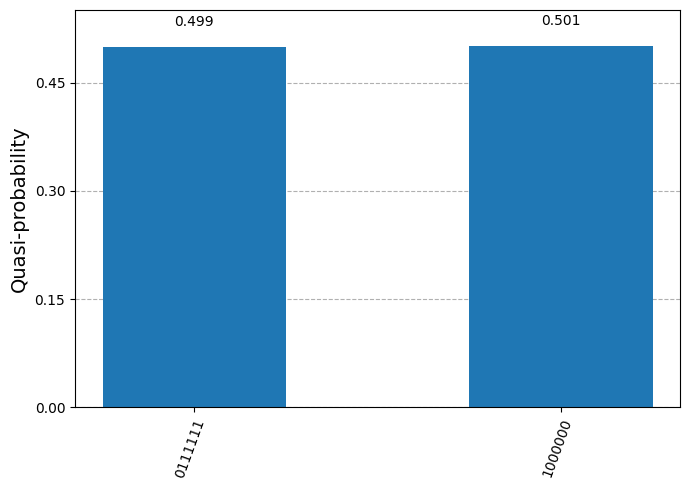

In [ ]:
"""quantum_circuit2.ipynb"""

# Cell 01 - Circuit to produce only two states (63 or 64 decimal)

from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(7)

# Perform Hadamard on qubit 0 for 50/50 superposition
# Then CNOT qubit 0 in a cascade, resulting in everything excited or
# everything not excited (|0000000> or |1111111>)
# Then perform NOT gate on qubit 6, making it the odd one out in both kets
# |1000000> or |0111111>
qc.h(0)
for i in range(6):
    qc.cx(i, i + 1)
qc.x(6)
qc.measure_all()

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))